Name :- Amit.Y.Zope

Roll No.:- 323066

Gr No. :- 21810714

Division:- C

Batch :- C3

Subject :- Data Science

Operations done in previous Assignment : 
    1. treated missing values for independant and dependant variable
    2. changed datatype of no. of times visited attribute from obj to int
    3. treated outliers with imputation
    4. using housing data dataset with name HousingData_A2 in this assignment

In [1]:
import pandas as pd
import numpy as np

In [2]:
HousingData_A2 = pd.read_csv('HousingData_A2.csv')

In [3]:
HousingData_A2.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Performing Data Cleaning,Data Integration and Data Transformation

In [4]:
#Some variables in dataset are not of much meaning converting them in meaningfull variable
#transformation will be done 
#We can derive two variables from rennovation year attribute
#1. ever renovated(whether the housr was renovated or not (catgorical variable))
#2. year since renovation(how many years passed after renovation)
#deriving new attribute

HousingData_A2['Ever Renovated'] = np.where(HousingData_A2['Renovated Year']==0,'No','Yes')
HousingData_A2.head(4)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No


In [5]:
#Deriving another new attribute Year since renovation 
#year since renovation = year of sale - year of renovation
#year of sale can be taken from date house was sold
#years since renovation is numerical variable
HousingData_A2['Purchase Year'] = pd.DatetimeIndex(HousingData_A2['Date House was Sold']).year


In [6]:
HousingData_A2['Year Since Renovation'] = np.where(HousingData_A2['Ever Renovated']=='Yes',
                                                  abs(HousingData_A2['Purchase Year']-HousingData_A2['Renovated Year']),0)

In [7]:
HousingData_A2.drop(columns=['Date House was Sold','Purchase Year','Renovated Year'],inplace = True)

In [8]:
#Removing the unwanted attributes Date House was Sold,Renovated year,Purchase Year
HousingData_A2.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


# Summary Statistics 

In [9]:
pd.options.display.float_format = "{:.3f}".format
#displaying each feature summary statistics
HousingData_A2.describe().T.iloc[1:,:]

,count,mean,std,min,25%,50%,75%,max
Sale Price,21609.000,511618.558,250062.014,75000.000,321950.000,450000.000,645000.000,1129575.000
No of Bedrooms,21609.000,3.371,0.930,0.000,3.000,3.000,4.000,33.000
No of Bathrooms,21609.000,2.115,0.770,0.000,1.750,2.250,2.500,8.000
Flat Area (in Sqft),21609.000,2079.873,918.348,290.000,1430.000,1910.000,2550.000,13540.000
Lot Area (in Sqft),21609.000,15106.407,41423.526,520.000,5040.000,7619.000,10687.000,1651359.000
No of Floors,21609.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
No of Times Visited,21609.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
Overall Grade,21609.000,7.623,1.106,1.000,7.000,7.000,8.000,10.000
Area of the House from Basement (in Sqft),21609.000,1788.320,827.978,290.000,1190.000,1560.000,2210.000,9410.000
Basement Area (in Sqft),21609.000,291.513,442.571,0.000,0.000,0.000,560.000,4820.000


Here Count - is the number of records in the dataset for that attribute
     mean - is the mean of that attribute
     std  - is the standard deviation of attribute
     min - is the minimum value of the attribute
     25% - is first quartile 25% of that
     50% - is second quartile is median of data
     75% - is third quartile
     max - is the maximum value of that attribute

In [10]:
#displaying only those attribute 
#summary statistics for target variable
print(HousingData_A2['Sale Price'].describe().T)

count     21609.000
mean     511618.558
std      250062.014
min       75000.000
25%      321950.000
50%      450000.000
75%      645000.000
max     1129575.000
Name: Sale Price, dtype: float64


In [11]:
#Displaying Variances and standard deviation of each attribute
variances1 = pd.DataFrame()
variances1['Variances'] = HousingData_A2.var()
variances1['Standard Deviation'] = HousingData_A2.std()
variances1['Mean'] = HousingData_A2.mean()
variances1['First Quartile'] = HousingData_A2.quantile(0.25)
variances1['Second Quartile'] = HousingData_A2.quantile(0.50)
variances1['Third Quartile'] = HousingData_A2.quantile(0.75)
variances1.drop('ID',axis=0)

,Variances,Standard Deviation,Mean,First Quartile,Second Quartile,Third Quartile
Sale Price,62531010596.264,250062.014,511618.558,321950.000,450000.000,645000.000
No of Bedrooms,0.865,0.930,3.371,3.000,3.000,4.000
No of Bathrooms,0.593,0.770,2.115,1.750,2.250,2.500
Flat Area (in Sqft),843362.711,918.348,2079.873,1430.000,1910.000,2550.000
Lot Area (in Sqft),1715908518.053,41423.526,15106.407,5040.000,7619.000,10687.000
No of Floors,0.292,0.540,1.494,1.000,1.500,2.000
No of Times Visited,0.587,0.766,0.234,0.000,0.000,0.000
Overall Grade,1.222,1.106,7.623,7.000,7.000,8.000
Area of the House from Basement (in Sqft),685546.912,827.978,1788.320,1190.000,1560.000,2210.000
Basement Area (in Sqft),195869.082,442.571,291.513,0.000,0.000,560.000


# Seeing the Correlation between independant and dependant  numerical variable

In [12]:
#between Sale price and No of time Visited
HousingData_A2['Sale Price'].corr(HousingData_A2['No of Times Visited'])

0.3561143859084817

In [13]:
#between all varialbes
HousingData_A2.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation
Sale Price,1.000,0.339,0.535,0.695,0.101,0.299,0.356,0.681,0.607,0.308,-0.064,-0.043,0.402,0.045,0.630,0.092,0.066
No of Bedrooms,0.339,1.000,0.516,0.577,0.032,0.176,0.080,0.349,0.478,0.303,-0.154,-0.153,-0.009,0.130,0.392,0.029,-0.007
No of Bathrooms,0.535,0.516,1.000,0.755,0.088,0.501,0.188,0.636,0.685,0.284,-0.506,-0.204,0.025,0.223,0.569,0.087,0.004
Flat Area (in Sqft),0.695,0.577,0.755,1.000,0.173,0.354,0.285,0.706,0.876,0.435,-0.318,-0.199,0.053,0.240,0.756,0.183,0.024
Lot Area (in Sqft),0.101,0.032,0.088,0.173,1.000,-0.005,0.075,0.102,0.183,0.015,-0.053,-0.130,-0.086,0.229,0.145,0.719,0.014
No of Floors,0.299,0.176,0.501,0.354,-0.005,1.000,0.030,0.461,0.524,-0.246,-0.489,-0.059,0.050,0.126,0.280,-0.011,-0.001
No of Times Visited,0.356,0.080,0.188,0.285,0.075,0.030,1.000,0.224,0.168,0.277,0.053,0.085,0.006,-0.078,0.280,0.073,0.094
Overall Grade,0.681,0.349,0.636,0.706,0.102,0.461,0.224,1.000,0.705,0.145,-0.457,-0.186,0.111,0.202,0.681,0.108,-0.024
Area of the House from Basement (in Sqft),0.607,0.478,0.685,0.876,0.183,0.524,0.168,0.705,1.000,-0.052,-0.424,-0.261,-0.001,0.344,0.732,0.194,0.010
Basement Area (in Sqft),0.308,0.303,0.284,0.435,0.015,-0.246,0.277,0.145,-0.052,1.000,0.133,0.075,0.110,-0.145,0.200,0.017,0.029


# Categorical Variables Exploration

In [14]:
# Condition of the House 
# Zipcode
# Waterfront view
# Ever Renovated
HousingData_A2['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


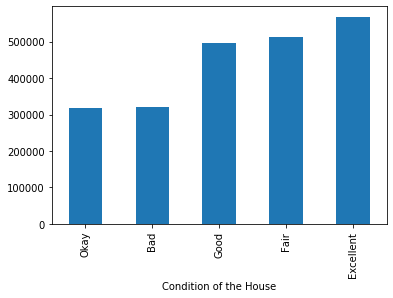

In [15]:
#printing the bar chart grouped by condition of the house based on mean of sale price
print(HousingData_A2.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


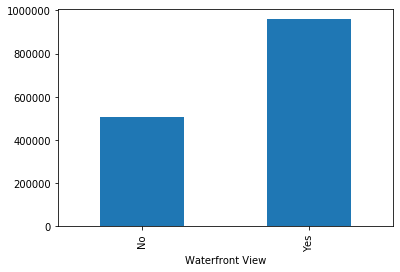

In [16]:
print(HousingData_A2.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


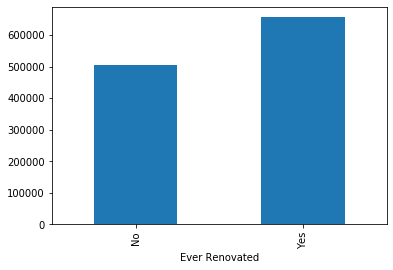

In [17]:
print(HousingData_A2.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind='bar'))

# Finding impact of categorical variables on target variables

In [18]:
#renaming variables
HousingData_A2 = HousingData_A2.rename(columns={'Sale Price':'Sale_Price','Ever Renovated':'Ever_Renovated',
                                               'Waterfront View':'Waterfront_View','Condition of the House':'Condition_of_the_House'})

In [19]:
#for one way analysics Anova
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [20]:
#relation between sale price and condition of the House
pd.options.display.float_format = "{}".format
rel = ols('Sale_Price ~ Condition_of_the_House',data=HousingData_A2).fit()
sm.stats.anova_lm(rel,typ=2)

,sum_sq,df,F,PR(>F)
Condition_of_the_House,14418314279751.309,4.0,58.25562950338545,5.4476052502939096e-49
Residual,1336751762684348.0,21604.0,nan,nan


In [21]:
rel = ols('Sale_Price ~ Ever_Renovated',data=HousingData_A2).fit()
sm.stats.anova_lm(rel,typ=2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,19984629877994.797,1.0,324.3784693703181,5.41905525277335e-72
Residual,1331185447086105.8,21607.0,nan,nan


In [22]:
rel = ols('Sale_Price ~ Waterfront_View',data=HousingData_A2).fit()
sm.stats.anova_lm(rel,typ=2)
#inall three p value is much less than 0.05 so they have a significant impact on Sale_price

,sum_sq,df,F,PR(>F)
Waterfront_View,32837368342781.37,1.0,538.1926831842557,1.2755581013076894e-117
Residual,1318332708621322.5,21607.0,nan,nan


# Creating Dummy variables required for model building 


In [23]:
#using get_dummies function of pandas library

In [24]:
HousingData_A2 = pd.get_dummies(HousingData_A2,columns=['Condition_of_the_House','Ever_Renovated','Waterfront_View'],drop_first=True)

In [25]:
HousingData_A2.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.0,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,5631500400,180000.0,2,1.0,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.0,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.0,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


In [26]:
#for zipcode it has more level first scaling it down to 10 groups
#grpuping zipcode based on average value of sale price
HousingData_A2['Zipcode'].nunique()

70

In [27]:
Zip_Table = HousingData_A2.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [28]:
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.0351758794
98168.0,240328.3717472119
98032.0,251296.24
98001.0,280804.6906077348
98148.0,284908.5964912281


In [29]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'],bins=10,
                                   labels = ['Zipcode_Group_0',
                                   'Zipcode_Group_1',
                                   'Zipcode_Group_2',
                                   'Zipcode_Group_3',
                                   'Zipcode_Group_4',
                                   'Zipcode_Group_5',
                                   'Zipcode_Group_6',
                                   'Zipcode_Group_7',
                                   'Zipcode_Group_8',
                                   'Zipcode_Group_9'],
                                   include_lowest = True)   

In [30]:
Zip_Table = Zip_Table.drop(columns=['Sale_Price'])

In [31]:
Zip_Table

,Zipcode_Group
Zipcode,
98002.0,Zipcode_Group_0
98168.0,Zipcode_Group_0
98032.0,Zipcode_Group_0
98001.0,Zipcode_Group_0
98148.0,Zipcode_Group_0
...,...
98109.0,Zipcode_Group_6
98112.0,Zipcode_Group_7
98040.0,Zipcode_Group_8


In [32]:
HousingData_A2 = pd.merge(HousingData_A2
                         ,Zip_Table,
                         left_on='Zipcode',
                         how='left',
                         right_index=True)

In [33]:
HousingData_A2 = HousingData_A2.drop(columns="Zipcode")

In [34]:
HousingData_A2.head()


,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.0,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_2
2,5631500400,180000.0,2,1.0,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,2487200875,604000.0,4,3.0,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,1954400510,510000.0,3,2.0,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4


In [35]:
HousingData_A2.head(3)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.0,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_2
2,5631500400,180000.0,2,1.0,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2


In [36]:
#Now Creating Dummy variables for zipcode_group
HousingData_A2 = pd.get_dummies(HousingData_A2,columns=['Zipcode_Group'],drop_first=True)

In [37]:
HousingData_A2

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.0,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.0,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.0,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.0,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,360000.0,3,2.5,1530.0,1131.0,3.0,0,8,1530.0,...,0,0,0,1,0,0,0,0,0,0
21605,6600060120,400000.0,4,2.5,2310.0,5813.0,2.0,0,8,2310.0,...,0,1,0,0,0,0,0,0,0,0
21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,0,0,0,1,0,0,0,0,0,0
21607,291310100,400000.0,3,2.5,1600.0,2388.0,2.0,0,8,1600.0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
HousingData_A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale_Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   No of Times Visited                        21609 non-null  int64  
 8   Overall Grade                              21609 non-null  int64  
 9   Area of the House from Basement (in Sqft)  21609 non-null  float64
 10  Basement Area (in Sqft

In [40]:
import matplotlib.pyplot as pt

In [42]:
HousingData_A2.corr()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
ID,1.0,-0.01152924007926433,0.0014497196501036358,0.00523255450717364,-0.01237915448467873,-0.13215266302560477,0.01865294488458968,0.01155233975024733,0.013761933378918727,-0.010723731869946527,...,-0.0027329104863485533,-0.03930610912524182,-0.023843866123496912,-0.00011132722443322671,0.09022913398736097,-0.08213001918863772,0.0031556727453934115,0.009585693260734128,-0.01633042130607603,-0.013811327507774397
Sale_Price,-0.01152924007926433,1.0,0.33940708723595164,0.5351240495828634,0.6951704258420736,0.1013189359879035,0.298913065975673,0.3561143859085543,0.6809143322116491,0.606527280442409,...,0.15589391469972796,-0.21050934511709893,-0.13614692787035382,0.06458047313079385,0.21293487961949495,0.17670523778914585,0.2986455280942814,0.16576009827641244,0.31307560518398736,0.11372564180713186
No of Bedrooms,0.0014497196501036358,0.33940708723595164,1.0,0.5158125371839768,0.5766279110292468,0.031691705476528206,0.175536277335014,0.07957546337171521,0.349222789929476,0.4775485491802833,...,-0.006577545514305701,-0.010603014466407946,-0.03934151457808609,-0.07412866770226309,0.02443340191947117,0.019419599338122102,0.09017725587596268,0.016724949778557825,0.1027357610847388,0.035694420776580596
No of Bathrooms,0.00523255450717364,0.5351240495828634,0.5158125371839768,1.0,0.7545676940858126,0.0877315874408179,0.5007764206781269,0.18779134910444306,0.6356380727282246,0.6850878797737701,...,0.06376052636427196,-0.03281019603576054,-0.08146008734252826,-0.03445860113730688,0.08405358694949831,0.052803582596328426,0.12325626679132949,0.037745952023463786,0.11001185493430948,0.06787058743448308
Flat Area (in Sqft),-0.01237915448467873,0.6951704258420736,0.5766279110292468,0.7545676940858126,1.0,0.172720528521271,0.35414234577771353,0.2846778929660976,0.7057249735648259,0.8762260552694131,...,0.10384060373343185,-0.058817317841342566,-0.06300452773837113,-0.07876073441045732,0.08613916739982244,0.07597774944562188,0.16004476291443928,0.051210853834147696,0.16957591030484204,0.09025293710333641
Lot Area (in Sqft),-0.13215266302560477,0.1013189359879035,0.031691705476528206,0.0877315874408179,0.172720528521271,1.0,-0.0051615804100280304,0.07466800244908538,0.10231415441077407,0.18349162475585606,...,0.02160530540176125,0.02368399356573274,0.05210266181540335,-0.04111214887542623,-0.01204972659284589,0.01531950667450907,-0.023269662752086313,-0.0274188791499297,-0.0070247116981730145,0.0026706907410688364
No of Floors,0.01865294488458968,0.298913065975673,0.175536277335014,0.5007764206781269,0.35414234577771353,-0.0051615804100280304,1.0,0.029504158000902166,0.4613675535442973,0.5240305518705994,...,0.023719138648074966,-0.003384530789834965,-0.06790413611824903,0.07921120971274132,0.07178562860503528,0.009202737685177697,0.06985656068194582,0.0649807809466123,-0.008633108670067047,0.005867921995353742
No of Times Visited,0.01155233975024733,0.3561143859085543,0.07957546337171521,0.18779134910444306,0.2846778929660976,0.07466800244908538,0.029504158000902166,1.0,0.2236609496224616,0.1678118008805443,...,0.40185617667087614,-0.06500040022072955,0.004754499379232786,0.005904772607421623,0.003509309845369761,0.02480065811887995,0.06814427791841586,-0.012547596919974379,0.06533495276433782,0.012923227750967877
Overall Grade,0.013761933378918727,0.6809143322116491,0.349222789929476,0.6356380727282246,0.7057249735648259,0.10231415441077407,0.4613675535442973,0.2236609496224616,1.0,0.7051534263405359,...,0.07033229653016355,-0.07549462876921599,-0.12137914361173957,-0.047869082082944

In [ ]:
Final = HousingData_A2.corr()['Sale_Price']
pt.bar(HousingData_A2['Overall Grade'],HousingData_A2['Sale_Price'])

<BarContainer object of 21609 artists>